In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import  r2_score



In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 4\\')

In [3]:
df1= pd.read_csv('Position Salary .csv')
print (df1)


            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [4]:
x= df1.iloc[:,1:2].values
print (x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
y= df1.iloc[:,2].values
print (y)


[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit (x,y)

RandomForestRegressor()

In [12]:
y_pred = rf.predict(x)
print (y_pred)


[ 48900.  51100.  59950. 107600. 133000. 130100. 105850.  92800.  92800.
  88200.]


In [13]:
y

array([ 45000,  50000,  60000, 120000, 140000, 130000, 100000,  90000,
        95000,  85000])

In [14]:
result =  pd.concat ([df1, pd.DataFrame(y_pred,columns = ['Prediction'])],axis = 1 )
result['Difference'] = result['Salary'] - result['Prediction']
print (result)


            Position  Level  Salary  Prediction  Difference
0   Busienss Analyst      1   45000     48900.0     -3900.0
1  Junior Consultant      2   50000     51100.0     -1100.0
2  Senior Consultant      3   60000     59950.0        50.0
3            Manager      4  120000    107600.0     12400.0
4    Country Manager      5  140000    133000.0      7000.0
5     Region Manager      6  130000    130100.0      -100.0
6            Partnor      7  100000    105850.0     -5850.0
7     Senior Partnor      8   90000     92800.0     -2800.0
8            C Level      9   95000     92800.0      2200.0
9               CEO      10   85000     88200.0     -3200.0


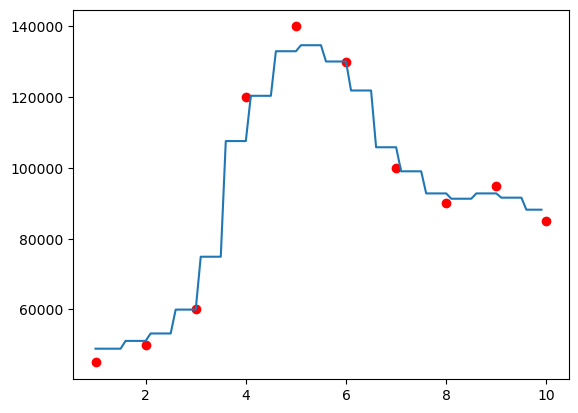

In [15]:

flat_x =x.ravel() 
x_grid = np.arange(min(flat_x ),max(flat_x ),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, rf.predict(x_grid))
plt.show()


In [16]:
accuracy = r2_score(y,y_pred)
print (accuracy)


0.9713716653716654


In [17]:
rf.predict ([[3],[3.4], [3.8],[4.2]])

array([ 59950.,  74900., 107600., 120400.])